# Worksheet: Algoritma Recommender System dalam Machine Learning

## 1. Pengantar Recommender System

Recommender system adalah algoritma yang bertujuan untuk memprediksi preferensi pengguna terhadap item tertentu berdasarkan data historis atau informasi tentang item dan pengguna. Sistem ini telah menjadi bagian penting dalam berbagai aplikasi seperti e-commerce, layanan streaming musik/video, dan platform konten lainnya.

### 1.1 Mengapa Recommender System Penting?

- **Personalisasi**: Meningkatkan pengalaman pengguna dengan konten yang relevan
- **Peningkatan Engagement**: Pengguna cenderung berinteraksi lebih lama dengan sistem yang memberikan rekomendasi yang relevan
- **Peningkatan Konversi**: Membantu pengguna menemukan produk/layanan yang mereka butuhkan lebih cepat

### 1.2 Jenis Utama Recommender System

1. **Non-Personalized Recommender**: Rekomendasi yang sama untuk semua pengguna
2. **Content-Based Filtering**: Rekomendasi berdasarkan karakteristik item
3. **Collaborative Filtering**: Rekomendasi berdasarkan perilaku pengguna lain yang serupa
4. **Matrix Factorization**: Teknik decomposition matrix untuk rekomendasi
5. **Hybrid Methods**: Kombinasi dari pendekatan di atas

Mari kita bahas secara bertahap dengan implementasi Python.

## 2. Non-Personalized Recommender

Ini adalah pendekatan paling sederhana dalam recommender system, di mana rekomendasi tidak disesuaikan dengan preferensi individu.

### Tugas 1: Eksplorasi Dataset
Sebelum mulai membangun model, penting untuk memahami data yang akan kita gunakan:

1. Download dataset MovieLens Small (ml-latest-small) dari https://grouplens.org/datasets/movielens/
2. Lakukan eksplorasi dan analisis data untuk menjawab pertanyaan berikut:
   - Berapa jumlah user, item (film), dan rating dalam dataset?
   - Bagaimana distribusi rating? (buat histogram)
   - Siapa pengguna yang paling aktif memberi rating?
   - Film apa yang mendapatkan rating terbanyak?
   - Bagaimana distribusi genre film dalam dataset?
3. Visualisasikan hasil analisis Anda dengan matplotlib atau seaborn
4. Buatlah kesimpulan dari hasil eksplorasi Anda

### 2.1 Popularity-Based Recommendation

Sistem ini merekomendasikan item yang paling populer (berdasarkan jumlah interaksi, rating, atau views).

#### Konsep dan Rumus:
- Rating rata-rata: $\bar{r}_i = \frac{\sum_{u} r_{ui}}{n_i}$
- Popularitas: $pop_i = \text{count}(r_{ui})$

dimana:
- $r_{ui}$ adalah rating dari pengguna $u$ untuk item $i$
- $n_i$ adalah jumlah pengguna yang memberikan rating untuk item $i$

#### Implementasi Python:

In [1]:
import pandas as pd
import numpy as np

# Load dataset (gunakan MovieLens sebagai contoh)
# Dataset dapat diunduh dari: https://grouplens.org/datasets/movielens/
# Untuk contoh ini, kita akan menggunakan versi kecil: ml-latest-small

# Baca data ratings
ratings = pd.read_csv('ml-latest-small/ratings.csv')
movies = pd.read_csv('ml-latest-small/movies.csv')

# Hitung popularitas berdasarkan jumlah rating
movie_popularity = ratings.groupby('movieId').size().reset_index(name='count')
movie_popularity = movie_popularity.sort_values('count', ascending=False)

# Gabungkan dengan data film untuk mendapatkan judul
popular_movies = movie_popularity.merge(movies, on='movieId')

# Tampilkan 10 film terpopuler
print("10 Film Terpopuler Berdasarkan Jumlah Rating:")
print(popular_movies[['title', 'count']].head(10))

# Hitung popularitas berdasarkan rating rata-rata (minimal 100 rating)
movie_ratings = ratings.groupby('movieId').agg(
    mean_rating=('rating', 'mean'),
    count=('rating', 'count')
).reset_index()

# Filter film dengan minimal 100 rating
popular_by_rating = movie_ratings[movie_ratings['count'] >= 100].sort_values('mean_rating', ascending=False)
popular_by_rating = popular_by_rating.merge(movies, on='movieId')

print("\n10 Film Terpopuler Berdasarkan Rating Rata-rata (min. 100 rating):")
print(popular_by_rating[['title', 'mean_rating', 'count']].head(10))

10 Film Terpopuler Berdasarkan Jumlah Rating:
                                       title  count
0                        Forrest Gump (1994)    329
1           Shawshank Redemption, The (1994)    317
2                        Pulp Fiction (1994)    307
3           Silence of the Lambs, The (1991)    279
4                         Matrix, The (1999)    278
5  Star Wars: Episode IV - A New Hope (1977)    251
6                       Jurassic Park (1993)    238
7                          Braveheart (1995)    237
8          Terminator 2: Judgment Day (1991)    224
9                    Schindler's List (1993)    220

10 Film Terpopuler Berdasarkan Rating Rata-rata (min. 100 rating):
                              title  mean_rating  count
0  Shawshank Redemption, The (1994)     4.429022    317
1             Godfather, The (1972)     4.289062    192
2                 Fight Club (1999)     4.272936    218
3    Godfather: Part II, The (1974)     4.259690    129
4              Departed, The (2006

### 2.2 Trending Items

Rekomendasi berdasarkan item yang sedang tren (popularitas dengan bobot waktu).

#### Konsep dan Rumus:
- Trending score: $trend_i = \sum_{u} w(t_{now} - t_{ui}) \cdot r_{ui}$

dimana:
- $t_{ui}$ adalah waktu interaksi pengguna $u$ dengan item $i$
- $t_{now}$ adalah waktu sekarang
- $w(t)$ adalah fungsi bobot yang memberikan nilai lebih tinggi untuk interaksi yang lebih baru

### Tugas 2: Implementasi Non-Personalized Recommender
Pada tugas ini, Anda akan mengimplementasikan dan memodifikasi algoritma non-personalized recommender:

1. Gunakan dataset [Steam Video Games](https://www.kaggle.com/datasets/tamber/steam-video-games) dari Kaggle yang berisi data penggunaan game di platform Steam
2. Implementasikan dua jenis non-personalized recommender:
   - **Most Popular**: Temukan game paling populer berdasarkan jumlah jam bermain
   - **Trending Games**: Buat algoritma trending yang memberi bobot lebih tinggi untuk game yang dimainkan baru-baru ini
3. Modifikasi fungsi bobot waktu dengan 3 pendekatan berbeda:
   - Linear decay
   - Exponential decay
   - Custom decay function (rancangan Anda sendiri)
4. Bandingkan hasil rekomendasi dari ketiga pendekatan tersebut
5. Buatlah visualisasi yang menunjukkan perbedaan ranking game berdasarkan ketiga pendekatan tersebut

#### Implementasi Python:

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime

# Asumsikan ratings.csv memiliki kolom timestamp yang menyimpan waktu rating
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')

# Tentukan tanggal referensi sebagai "sekarang"
now = datetime.now()

# Fungsi untuk menghitung bobot berdasarkan usia (dalam hari)
def time_weight(timestamp):
    age_days = (now - timestamp).days
    # Fungsi bobot eksponensial sederhana
    return np.exp(-0.01 * age_days)

# Hitung trending score
ratings['time_weight'] = ratings['timestamp'].apply(time_weight)
ratings['weighted_rating'] = ratings['rating'] * ratings['time_weight']

# Agregat trending score per film
trending_movies = ratings.groupby('movieId').agg(
    trending_score=('weighted_rating', 'sum'),
    count=('movieId', 'count')
).reset_index()

# Filter film dengan minimal 20 rating
trending_movies = trending_movies[trending_movies['count'] >= 20].sort_values('trending_score', ascending=False)
trending_movies = trending_movies.merge(movies, on='movieId')

print("10 Film Tren Teratas:")
print(trending_movies[['title', 'trending_score', 'count']].head(10))

10 Film Tren Teratas:
                                               title  trending_score  count
0                                 Matrix, The (1999)    1.583393e-09    278
1                                   Inception (2010)    1.529910e-09    143
2  Lord of the Rings: The Return of the King, The...    1.468482e-09    185
3      Lord of the Rings: The Two Towers, The (2002)    1.431781e-09    188
4                              Thor: Ragnarok (2017)    1.424453e-09     20
5                            Dark Knight, The (2008)    1.419388e-09    149
6  Lord of the Rings: The Fellowship of the Ring,...    1.390141e-09    198
7                            Incredibles, The (2004)    1.296526e-09    125
8                   Shawshank Redemption, The (1994)    1.192674e-09    317
9                               Batman Begins (2005)    1.141860e-09    116


## 3. Content-Based Filtering

Content-based filtering memberikan rekomendasi berdasarkan kesamaan antara item dengan preferensi pengguna terhadap item sebelumnya.

### 3.1 TF-IDF untuk Representasi Item

Term Frequency-Inverse Document Frequency (TF-IDF) adalah metode statistik untuk mengukur pentingnya sebuah kata dalam dokumen.

#### Konsep dan Rumus:
- Term Frequency (TF): $TF(t,d) = \frac{f_{t,d}}{\sum_{t' \in d} f_{t',d}}$
- Inverse Document Frequency (IDF): $IDF(t) = \log \frac{N}{DF(t)}$
- TF-IDF: $TFIDF(t,d) = TF(t,d) \times IDF(t)$

dimana:
- $f_{t,d}$ adalah frekuensi term $t$ dalam dokumen $d$
- $N$ adalah jumlah total dokumen
- $DF(t)$ adalah jumlah dokumen yang mengandung term $t$

#### Implementasi Python:

In [3]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Gunakan data genre dan overview film untuk content-based filtering
movies = pd.read_csv('ml-latest-small/movies.csv')

# Ekstrak genre
movies['genres'] = movies['genres'].str.replace('|', ' ')

# Gunakan TF-IDF untuk mengekstrak fitur dari genre
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(movies['genres'])

# Konversi matrix TF-IDF ke dalam format DataFrame untuk eksplorasi
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out(), index=movies['title'])

print("Representasi TF-IDF untuk 5 film pertama (fitur genre):")
print(tfidf_df.head())

Representasi TF-IDF untuk 5 film pertama (fitur genre):
                                    action  adventure  animation  children  \
title                                                                        
Toy Story (1995)                       0.0   0.416846   0.516225  0.504845   
Jumanji (1995)                         0.0   0.512361   0.000000  0.620525   
Grumpier Old Men (1995)                0.0   0.000000   0.000000  0.000000   
Waiting to Exhale (1995)               0.0   0.000000   0.000000  0.000000   
Father of the Bride Part II (1995)     0.0   0.000000   0.000000  0.000000   

                                      comedy  crime  documentary     drama  \
title                                                                        
Toy Story (1995)                    0.267586    0.0          0.0  0.000000   
Jumanji (1995)                      0.000000    0.0          0.0  0.000000   
Grumpier Old Men (1995)             0.570915    0.0          0.0  0.000000   
Waiting

### 3.2 Cosine Similarity untuk Rekomendasi

Cosine similarity mengukur kesamaan antara dua vektor dan menentukan apakah mereka menunjuk ke arah yang sama, terlepas dari besarnya.

#### Konsep dan Rumus:
- Cosine Similarity: $cos(\theta) = \frac{\mathbf{A} \cdot \mathbf{B}}{|\mathbf{A}||\mathbf{B}|} = \frac{\sum_{i=1}^{n} A_i B_i}{\sqrt{\sum_{i=1}^{n} A_i^2} \sqrt{\sum_{i=1}^{n} B_i^2}}$

#### Implementasi Python:

In [4]:
# Hitung cosine similarity antara semua pasangan film
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Konversi ke DataFrame untuk kemudahan pembacaan
cosine_sim_df = pd.DataFrame(cosine_sim, index=movies['title'], columns=movies['title'])

# Fungsi untuk mendapatkan rekomendasi berdasarkan kesamaan konten
def get_content_based_recommendations(title, cosine_sim_df, n=10):
    # Dapatkan skor kesamaan untuk semua film dengan film yang ditentukan
    sim_scores = cosine_sim_df[title]
    
    # Urutkan film berdasarkan skor kesamaan
    sim_scores = sim_scores.sort_values(ascending=False)
    
    # Ambil top n rekomendasi (kecuali film itu sendiri yang akan memiliki skor 1.0)
    recommendations = sim_scores.iloc[1:n+1]
    
    return recommendations

# Contoh: Dapatkan rekomendasi untuk film "Toy Story"
print("\nRekomendasi untuk 'Toy Story' berdasarkan genre:")
print(get_content_based_recommendations("Toy Story (1995)", cosine_sim_df))


Rekomendasi untuk 'Toy Story' berdasarkan genre:
title
Toy Story 2 (1999)                                         1.0
Tale of Despereaux, The (2008)                             1.0
Asterix and the Vikings (Astérix et les Vikings) (2006)    1.0
Shrek the Third (2007)                                     1.0
Turbo (2013)                                               1.0
Monsters, Inc. (2001)                                      1.0
The Good Dinosaur (2015)                                   1.0
Antz (1998)                                                1.0
Emperor's New Groove, The (2000)                           1.0
Moana (2016)                                               1.0
Name: Toy Story (1995), dtype: float64


### 3.3 Content-Based dengan Fitur yang Lebih Kompleks

Pada contoh sebelumnya, kita hanya menggunakan genre. Sekarang kita akan mencoba menggabungkan beberapa fitur.

### Tugas 3: Content-Based Recommender untuk Dataset Buku

Pada tugas ini, Anda akan mengimplementasikan content-based filtering untuk dataset buku:

1. Download [Goodbooks-10k dataset](https://github.com/zygmuntz/goodbooks-10k) yang berisi data 10,000 buku populer
2. Fokus pada file `books.csv` yang berisi metadata buku seperti judul, penulis, dan tag
3. Implementasikan content-based filtering dengan langkah-langkah berikut:
   - Ekstrak fitur penting dari data buku (judul, penulis, tag)
   - Gunakan TF-IDF untuk mengubah data tekstual menjadi representasi vektor
   - Implementasikan 3 varian cosine similarity:
     a. Berdasarkan penulis saja
     b. Berdasarkan tag saja
     c. Kombinasi semua fitur dengan pembobotan yang Anda tentukan
4. Buat fungsi yang menerima judul buku dan mengembalikan 10 rekomendasi buku serupa
5. Analisis dan bandingkan hasil rekomendasi dari ketiga pendekatan tersebut
6. Bonus: Tambahkan fitur untuk menggabungkan preferensi pengguna (misalnya, rekomendasi berdasarkan beberapa buku favorit)

In [5]:
# Asumsikan kita memiliki data tambahan seperti deskripsi film, sutradara, dll.
# Kita akan membuat data dummy untuk contoh ini

# Tambahkan kolom overview dummy
np.random.seed(42)
movies['overview'] = ["This movie is about " + " ".join(genres.split("|")) 
                      for genres in movies['genres'].str.replace('|', ' ')]

# Buat fitur kombinasi
movies['content'] = movies['title'] + ' ' + movies['genres'] + ' ' + movies['overview']

# Gunakan TF-IDF untuk mengekstrak fitur
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(movies['content'])

# Hitung cosine similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
cosine_sim_df = pd.DataFrame(cosine_sim, index=movies['title'], columns=movies['title'])

print("\nRekomendasi untuk 'Toy Story' berdasarkan konten yang lebih lengkap:")
print(get_content_based_recommendations("Toy Story (1995)", cosine_sim_df))


Rekomendasi untuk 'Toy Story' berdasarkan konten yang lebih lengkap:
title
Toy Story 2 (1999)                       0.936980
Toy Story 3 (2010)                       0.818254
Wild, The (2006)                         0.694496
We're Back! A Dinosaur's Story (1993)    0.689270
Monsters, Inc. (2001)                    0.676985
Shrek the Third (2007)                   0.664053
Inside Out (2015)                        0.656824
Turbo (2013)                             0.654860
Antz (1998)                              0.642666
Moana (2016)                             0.641106
Name: Toy Story (1995), dtype: float64


## 4. Collaborative Filtering

Collaborative filtering memberikan rekomendasi berdasarkan kesamaan perilaku atau preferensi antar pengguna atau antar item.

### 4.1 User-Based Collaborative Filtering

Rekomendasi berdasarkan kesamaan antar pengguna.

#### Konsep dan Rumus:
- Similarity antara pengguna $u$ dan $v$: $sim(u,v) = \frac{\sum_{i \in I_{uv}} (r_{ui} - \bar{r}_u)(r_{vi} - \bar{r}_v)}{\sqrt{\sum_{i \in I_{uv}} (r_{ui} - \bar{r}_u)^2} \sqrt{\sum_{i \in I_{uv}} (r_{vi} - \bar{r}_v)^2}}$
- Prediksi rating: $\hat{r}_{ui} = \bar{r}_u + \frac{\sum_{v \in N_i(u)} sim(u,v) \cdot (r_{vi} - \bar{r}_v)}{\sum_{v \in N_i(u)} |sim(u,v)|}$

dimana:
- $I_{uv}$ adalah himpunan item yang dirating oleh pengguna $u$ dan $v$
- $\bar{r}_u$ adalah rating rata-rata dari pengguna $u$
- $N_i(u)$ adalah himpunan neighbor (pengguna serupa) dari pengguna $u$ yang telah merating item $i$

#### Implementasi Python:

In [6]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Load dataset
ratings = pd.read_csv('ml-latest-small/ratings.csv')
movies = pd.read_csv('ml-latest-small/movies.csv')

# Buat user-item matrix
user_item_matrix = ratings.pivot(index='userId', columns='movieId', values='rating').fillna(0)

# Fungsi untuk menghitung kesamaan antar pengguna
def compute_user_similarity(user_item_matrix):
    # Menggunakan cosine similarity
    similarity = cosine_similarity(user_item_matrix)
    similarity_df = pd.DataFrame(similarity, 
                               index=user_item_matrix.index, 
                               columns=user_item_matrix.index)
    return similarity_df

# Hitung user similarity
user_similarity = compute_user_similarity(user_item_matrix)

# Fungsi untuk memberikan rekomendasi berdasarkan user-based collaborative filtering
def user_based_recommendations(user_id, user_item_matrix, user_similarity, n_users=10, n_items=10):
    # Dapatkan n pengguna paling mirip
    similar_users = user_similarity[user_id].sort_values(ascending=False)[1:n_users+1]
    
    # Mendapatkan item yang belum dirating oleh pengguna
    items_to_recommend = user_item_matrix.columns[user_item_matrix.loc[user_id] == 0]
    
    # Membuat rekomendasi
    recommendations = {}
    
    for item in items_to_recommend:
        # Hitung prediksi rating untuk item
        item_ratings = user_item_matrix[item]
        weighted_ratings = 0
        similarity_sum = 0
        
        for similar_user, similarity in similar_users.items():
            if item_ratings[similar_user] > 0:  # Jika user memberikan rating
                weighted_ratings += similarity * item_ratings[similar_user]
                similarity_sum += similarity
        
        if similarity_sum > 0:
            predicted_rating = weighted_ratings / similarity_sum
            recommendations[item] = predicted_rating
    
    # Urutkan berdasarkan prediksi rating
    recommendations = pd.Series(recommendations).sort_values(ascending=False).head(n_items)
    
    # Dapatkan detail film
    recommended_movies = movies[movies['movieId'].isin(recommendations.index)]
    recommended_movies = recommended_movies.set_index('movieId')
    recommended_movies['predicted_rating'] = recommendations
    
    return recommended_movies[['title', 'predicted_rating']]

# Contoh: Rekomendasi untuk pengguna dengan ID 1
print("\nRekomendasi untuk Pengguna 1 (User-based Collaborative Filtering):")
print(user_based_recommendations(1, user_item_matrix, user_similarity))


Rekomendasi untuk Pengguna 1 (User-based Collaborative Filtering):
                                                title  predicted_rating
movieId                                                                
1228                               Raging Bull (1980)               5.0
1235                          Harold and Maude (1971)               5.0
1243     Rosencrantz and Guildenstern Are Dead (1990)               5.0
1719                      Sweet Hereafter, The (1997)               5.0
3022                              General, The (1926)               5.0
3037                            Little Big Man (1970)               5.0
4718                            American Pie 2 (2001)               5.0
4734            Jay and Silent Bob Strike Back (2001)               5.0
6460                   Trial, The (Procès, Le) (1962)               5.0
7173                          Along Came Polly (2004)               5.0


### 4.2 Item-Based Collaborative Filtering

Rekomendasi berdasarkan kesamaan antar item.

#### Konsep dan Rumus:
- Similarity antara item $i$ dan $j$: $sim(i,j) = \frac{\sum_{u \in U_{ij}} (r_{ui} - \bar{r}_i)(r_{uj} - \bar{r}_j)}{\sqrt{\sum_{u \in U_{ij}} (r_{ui} - \bar{r}_i)^2} \sqrt{\sum_{u \in U_{ij}} (r_{uj} - \bar{r}_j)^2}}$
- Prediksi rating: $\hat{r}_{ui} = \frac{\sum_{j \in N_u(i)} sim(i,j) \cdot r_{uj}}{\sum_{j \in N_u(i)} |sim(i,j)|}$

dimana:
- $U_{ij}$ adalah himpunan pengguna yang merating item $i$ dan $j$
- $\bar{r}_i$ adalah rating rata-rata untuk item $i$
- $N_u(i)$ adalah himpunan neighbor (item serupa) dari item $i$ yang telah dirating oleh pengguna $u$

### Tugas 4: Collaborative Filtering untuk Rekomendasi Musik

Pada tugas ini, Anda akan mengimplementasikan collaborative filtering untuk dataset musik:

1. Download [Last.fm Dataset (1K users)](http://ocelma.net/MusicRecommendationDataset/lastfm-1K.html) yang berisi data pendengar musik
2. Fokus pada file `user_artists.dat` yang berisi hubungan antara pengguna dan artis
3. Implementasikan kedua jenis collaborative filtering:
   - **User-based**: Rekomendasi berdasarkan pengguna serupa
   - **Item-based**: Rekomendasi berdasarkan artis serupa
4. Eksperimen dengan parameter algoritma:
   - Jumlah neighbor (k): 5, 10, 20, 50
   - Metode similarity: Cosine, Pearson correlation, Jaccard
   - Threshold minimal interaksi: 2, 5, 10
5. Untuk setiap konfigurasi:
   - Evaluasi performa dengan metode cross-validation
   - Hitung metrik precision@k dan recall@k
6. Identifikasi konfigurasi terbaik dan analisis hasilnya
7. Bonus: Implementasikan metode untuk mengatasi cold-start problem (pengguna baru)

#### Implementasi Python:

In [7]:
# Transpose user-item matrix untuk mendapatkan item-user matrix
item_user_matrix = user_item_matrix.T

# Hitung item similarity
def compute_item_similarity(item_user_matrix):
    # Menggunakan cosine similarity
    similarity = cosine_similarity(item_user_matrix)
    similarity_df = pd.DataFrame(similarity, 
                               index=item_user_matrix.index, 
                               columns=item_user_matrix.index)
    return similarity_df

item_similarity = compute_item_similarity(item_user_matrix)

# Fungsi untuk memberikan rekomendasi berdasarkan item-based collaborative filtering
def item_based_recommendations(user_id, user_item_matrix, item_similarity, n_items=10, n_similar=10):
    # Dapatkan item yang sudah dirating oleh pengguna
    user_ratings = user_item_matrix.loc[user_id]
    rated_items = user_ratings[user_ratings > 0].index
    
    # Dapatkan item yang belum dirating
    items_to_recommend = user_item_matrix.columns[user_item_matrix.loc[user_id] == 0]
    
    # Hitung prediksi rating untuk item yang belum dirating
    recommendations = {}
    
    for item_to_rec in items_to_recommend:
        # Dapatkan item serupa yang telah dirating pengguna
        similar_items = item_similarity[item_to_rec].loc[rated_items].sort_values(ascending=False).head(n_similar)
        
        # Hitung prediksi rating
        weighted_ratings = 0
        similarity_sum = 0
        
        for similar_item, similarity in similar_items.items():
            if similarity > 0:  # Positif similarity
                rating = user_ratings[similar_item]
                weighted_ratings += similarity * rating
                similarity_sum += similarity
        
        if similarity_sum > 0:
            predicted_rating = weighted_ratings / similarity_sum
            recommendations[item_to_rec] = predicted_rating
    
    # Urutkan berdasarkan prediksi rating
    recommendations = pd.Series(recommendations).sort_values(ascending=False).head(n_items)
    
    # Dapatkan detail film
    recommended_movies = movies[movies['movieId'].isin(recommendations.index)]
    recommended_movies = recommended_movies.set_index('movieId')
    recommended_movies['predicted_rating'] = recommendations
    
    return recommended_movies[['title', 'predicted_rating']]

# Contoh: Rekomendasi untuk pengguna dengan ID 1
print("\nRekomendasi untuk Pengguna 1 (Item-based Collaborative Filtering):")
print(item_based_recommendations(1, user_item_matrix, item_similarity))


Rekomendasi untuk Pengguna 1 (Item-based Collaborative Filtering):
                                                     title  predicted_rating
movieId                                                                     
5418                           Bourne Identity, The (2002)               5.0
5782           Professional, The (Le professionnel) (1981)               5.0
8873     Motorcycle Diaries, The (Diarios de motociclet...               5.0
33794                                 Batman Begins (2005)               5.0
48774                               Children of Men (2006)               5.0
68358                                     Star Trek (2009)               5.0
70286                                    District 9 (2009)               5.0
83132    Secret World of Arrietty, The (Kari-gurashi no...               5.0
98491                                      Paperman (2012)               5.0
157369                                      Bakuman (2015)               5.0


## 5. Matrix Factorization

Matrix factorization adalah teknik untuk mendekomposisi matriks user-item menjadi dua matriks berukuran lebih kecil yang merepresentasikan user dan item dalam ruang "laten".

### 5.1 Singular Value Decomposition (SVD)

SVD adalah salah satu teknik matrix factorization yang populer.

#### Konsep dan Rumus:
- SVD: $R \approx U \Sigma V^T$

dimana:
- $R$ adalah matriks rating user-item
- $U$ adalah matriks pengguna-faktor
- $\Sigma$ adalah matriks diagonal dengan singular value
- $V^T$ adalah matriks item-faktor transpos

#### Implementasi Python:

In [16]:
import pandas as pd
import numpy as np
from scipy.sparse.linalg import svds
from sklearn.metrics import mean_squared_error

# Load dataset
ratings = pd.read_csv('ml-latest-small/ratings.csv')
movies = pd.read_csv('ml-latest-small/movies.csv')

# Buat user-item matrix
user_item_matrix = ratings.pivot(index='userId', columns='movieId', values='rating').fillna(0)

# Fungsi untuk menerapkan SVD
def apply_svd(user_item_matrix, k=20):
    # Standardize matriks
    ratings_mean = np.mean(user_item_matrix.values, axis=1)
    ratings_demeaned = user_item_matrix.values - ratings_mean.reshape(-1, 1)
    
    # Terapkan SVD
    U, sigma, Vt = svds(ratings_demeaned, k=k)
    
    # Urutkan singular values
    sigma_diag = np.diag(sigma)
    
    # Rekonstruksi matriks rating
    predicted_ratings = U.dot(sigma_diag).dot(Vt) + ratings_mean.reshape(-1, 1)
    predicted_df = pd.DataFrame(predicted_ratings, 
                              index=user_item_matrix.index, 
                              columns=user_item_matrix.columns)
    
    return predicted_df, U, sigma, Vt

# Terapkan SVD dengan 20 faktor laten
predicted_ratings, U, sigma, Vt = apply_svd(user_item_matrix, k=20)

# Fungsi untuk memberikan rekomendasi berdasarkan matriks prediksi
def svd_recommendations(user_id, predicted_ratings, user_item_matrix, n_items=10):
    # Dapatkan prediksi rating untuk pengguna
    user_predictions = predicted_ratings.loc[user_id]
    
    # Dapatkan item yang belum dirating
    items_to_recommend = user_item_matrix.columns[user_item_matrix.loc[user_id] == 0]
    
    # Filter prediksi untuk item yang belum dirating
    predicted_ratings_unrated = user_predictions[items_to_recommend]
    
    # Urutkan berdasarkan prediksi rating
    recommendations = predicted_ratings_unrated.sort_values(ascending=False).head(n_items)
    
    # Dapatkan detail film
    recommended_movies = movies[movies['movieId'].isin(recommendations.index)]
    recommended_movies = recommended_movies.set_index('movieId')
    recommended_movies['predicted_rating'] = recommendations
    
    return recommended_movies[['title', 'predicted_rating']]

# Contoh: Rekomendasi untuk pengguna dengan ID 1
print("\nRekomendasi untuk Pengguna 1 (Matrix Factorization dengan SVD):")
print(svd_recommendations(1, predicted_ratings, user_item_matrix))

# Evaluasi performa SVD dengan RMSE
# Pisahkan data menjadi train dan test
from sklearn.model_selection import train_test_split

ratings_train, ratings_test = train_test_split(ratings, test_size=0.2, random_state=42)

# Buat matriks rating untuk training
user_item_train = ratings_train.pivot(index='userId', columns='movieId', values='rating').fillna(0)

# Terapkan SVD ke data training
predicted_ratings_train, _, _, _ = apply_svd(user_item_train, k=20)

# Evaluasi pada data test
test_user_item_pairs = list(zip(ratings_test['userId'], ratings_test['movieId']))
predicted = []
actual = []

for user_id, movie_id in test_user_item_pairs:
    if user_id in predicted_ratings_train.index and movie_id in predicted_ratings_train.columns:
        predicted.append(predicted_ratings_train.loc[user_id, movie_id])
        actual.append(ratings_test[(ratings_test['userId'] == user_id) & 
                                 (ratings_test['movieId'] == movie_id)]['rating'].values[0])

# Hitung RMSE
rmse = np.sqrt(mean_squared_error(actual, predicted))
print(f"\nRoot Mean Squared Error (RMSE) for SVD: {rmse:.4f}")


Rekomendasi untuk Pengguna 1 (Matrix Factorization dengan SVD):
                                             title  predicted_rating
movieId                                                             
32       Twelve Monkeys (a.k.a. 12 Monkeys) (1995)          2.739459
589              Terminator 2: Judgment Day (1991)          3.925441
858                          Godfather, The (1972)          2.932365
1036                               Die Hard (1988)          3.185293
1200                                 Aliens (1986)          3.705405
1259                            Stand by Me (1986)          3.033338
1387                                   Jaws (1975)          2.883143
1968                    Breakfast Club, The (1985)          3.276850
2762                       Sixth Sense, The (1999)          3.368373
2918               Ferris Bueller's Day Off (1986)          2.984676

Root Mean Squared Error (RMSE) for SVD: 3.0028


### 5.2 Alternating Least Squares (ALS)

ALS adalah algoritma matrix factorization yang memecahkan masalah optimasi dengan cara bergantian memperbaiki faktor pengguna dan faktor item.

#### Konsep dan Rumus:
ALS meminimalkan fungsi biaya:
$\min_{P,Q} \sum_{(u,i) \in K} (r_{ui} - p_u^T q_i)^2 + \lambda (||p_u||^2 + ||q_i||^2)$

dimana:
- $p_u$ adalah vektor faktor laten untuk pengguna $u$
- $q_i$ adalah vektor faktor laten untuk item $i$
- $\lambda$ adalah parameter regularisasi
- $K$ adalah himpunan pasangan (pengguna, item) dengan rating yang diketahui

### Tugas 5: Matrix Factorization untuk E-commerce

Pada tugas ini, Anda akan mengimplementasikan matrix factorization untuk data e-commerce:

1. Download [Retail Rocket Dataset](https://www.kaggle.com/datasets/retailrocket/ecommerce-dataset) yang berisi data interaksi pengguna dengan produk e-commerce
2. Lakukan preprocessing data:
   - Konversi event type (view, add-to-cart, transaction) menjadi nilai numerik
   - Buat user-item matrix berdasarkan interaksi
3. Implementasikan dua algoritma matrix factorization:
   - **SVD**: Menggunakan pendekatan SVD dari scipy
   - **ALS**: Menggunakan library implicit atau implementasi manual
4. Eksperimen dengan hyperparameter:
   - Jumlah faktor laten: 10, 20, 50, 100
   - Regularisasi (λ): 0.01, 0.1, 1.0
   - Iterasi: 10, 20, 50
5. Evaluasi dan bandingkan performa kedua algoritma menggunakan:
   - Metrik RMSE
   - Metrik ranking (precision@k, recall@k)
   - Waktu komputasi
6. Visualisasikan latent factors untuk mengetahui pola tersembunyi dalam data:
   - Gunakan t-SNE atau PCA untuk visualisasi
   - Identifikasi cluster yang muncul dari latent factors
7. Bonus: Implementasikan BPR (Bayesian Personalized Ranking) untuk optimasi ranking

#### Implementasi Python:

=== DEMO ALS PADA SUBSET ===
Melatih model ALS pada subset...
Selesai iterasi 5/5

Rekomendasi untuk user 1 dari model ALS subset:

Visualisasi ALS Latent Factors:


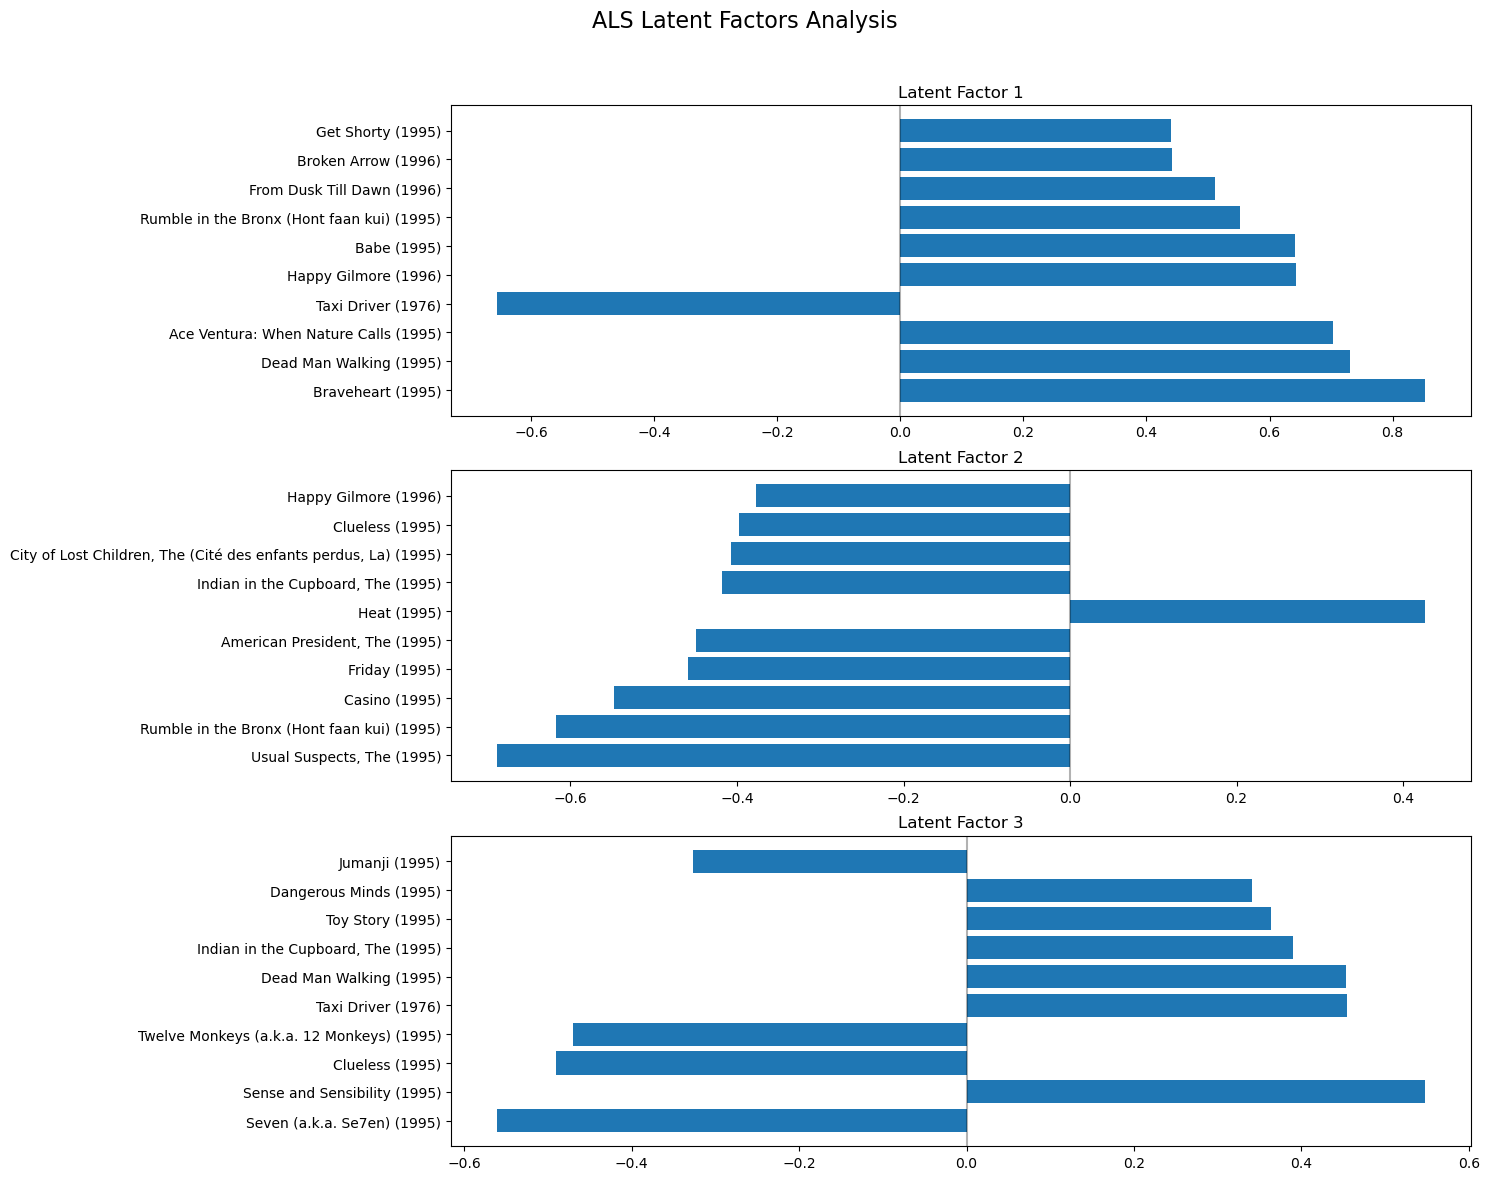

                                                title  \
15                                      Casino (1995)   
28  City of Lost Children, The (Cité des enfants p...   
93              Bridges of Madison County, The (1995)   
27                                  Persuasion (1995)   
61                                      Friday (1995)   
84                                Broken Arrow (1996)   
99         Rumble in the Bronx (Hont faan kui) (1995)   
31          Twelve Monkeys (a.k.a. 12 Monkeys) (1995)   
77                                White Squall (1996)   
4                  Father of the Bride Part II (1995)   

                                    genres  predicted_rating  
15                             Crime|Drama          5.931621  
28  Adventure|Drama|Fantasy|Mystery|Sci-Fi          4.978388  
93                           Drama|Romance          4.461739  
27                           Drama|Romance          4.121331  
61                                  Comedy          4.090

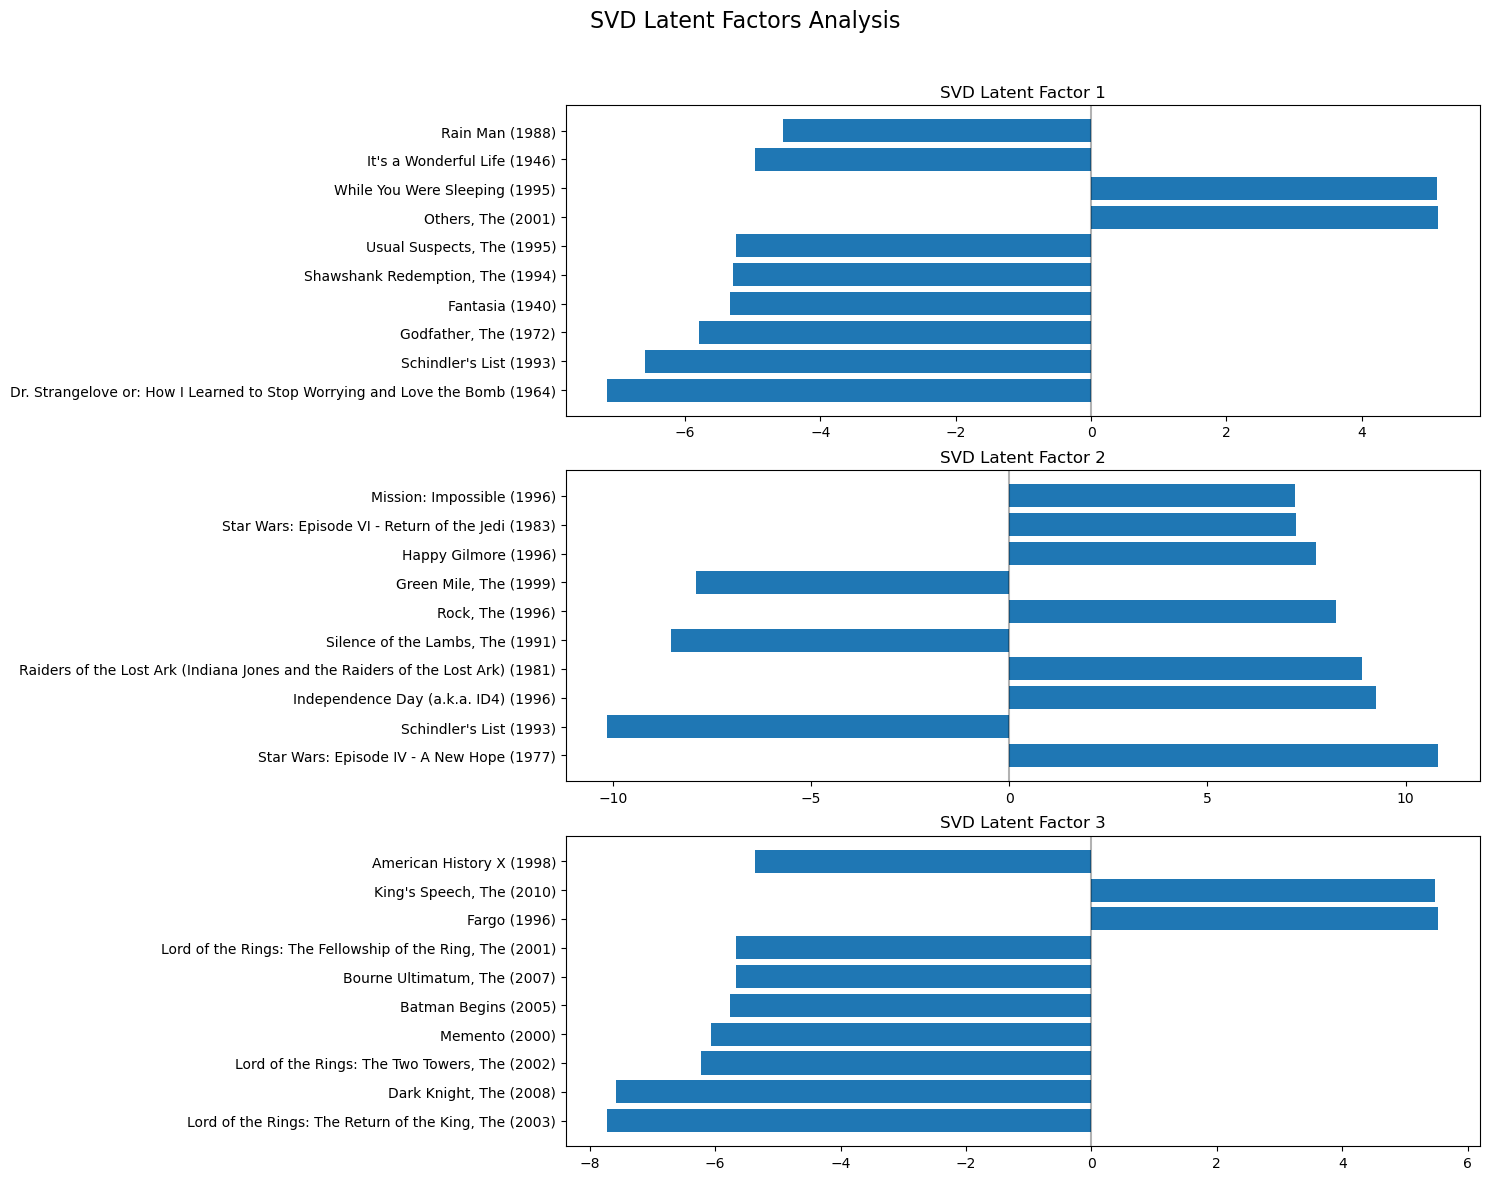

   movieId                                      title  \
0       32  Twelve Monkeys (a.k.a. 12 Monkeys) (1995)   
1      589          Terminator 2: Judgment Day (1991)   
2      858                      Godfather, The (1972)   
3     1036                            Die Hard (1988)   
4     1200                              Aliens (1986)   
5     1259                         Stand by Me (1986)   
6     1387                                Jaws (1975)   
7     1968                 Breakfast Club, The (1985)   
8     2762                    Sixth Sense, The (1999)   
9     2918            Ferris Bueller's Day Off (1986)   

                           genres  predicted_rating  
0         Mystery|Sci-Fi|Thriller          2.739459  
1                   Action|Sci-Fi          3.925441  
2                     Crime|Drama          2.932365  
3           Action|Crime|Thriller          3.185293  
4  Action|Adventure|Horror|Sci-Fi          3.705405  
5                 Adventure|Drama          3.033

In [19]:
import pandas as pd
import numpy as np
from scipy.sparse.linalg import svds
import matplotlib.pyplot as plt

# Load dataset
ratings = pd.read_csv('ml-latest-small/ratings.csv')
movies = pd.read_csv('ml-latest-small/movies.csv')

# Buat user-item matrix
user_item_df = ratings.pivot(index='userId', columns='movieId', values='rating').fillna(0)
user_item_matrix = user_item_df.values

# 1. Implementasi ALS Manual
def als_factorization(R, k=20, lambda_reg=0.1, iterations=20):
    """
    Implementasi manual Alternating Least Squares (ALS)
    
    Parameters:
    R (numpy.ndarray): User-item rating matrix
    k (int): Jumlah faktor laten
    lambda_reg (float): Parameter regularisasi
    iterations (int): Jumlah iterasi
    
    Returns:
    P (numpy.ndarray): User latent factors
    Q (numpy.ndarray): Item latent factors
    """
    m, n = R.shape  # m: jumlah user, n: jumlah item
    
    # Inisialisasi faktor laten secara acak
    P = np.random.normal(scale=1./k, size=(m, k))  # User factors
    Q = np.random.normal(scale=1./k, size=(n, k))  # Item factors
    
    # Mask untuk entry non-zero (rating yang diketahui)
    mask = R > 0
    
    # Iterasi ALS
    for iter in range(iterations):
        # Fix Q, solve for P
        for u in range(m):
            # Indeks item yang dirating oleh user u
            rated_items = np.where(mask[u])[0]
            if len(rated_items) == 0:
                continue
                
            # Item factors dan ratings untuk items yang dirating
            Q_u = Q[rated_items]
            r_u = R[u, rated_items]
            
            # Update user factors
            A = Q_u.T @ Q_u + lambda_reg * np.eye(k)
            b = Q_u.T @ r_u
            P[u] = np.linalg.solve(A, b)
        
        # Fix P, solve for Q
        for i in range(n):
            # Indeks user yang merating item i
            rating_users = np.where(mask[:, i])[0]
            if len(rating_users) == 0:
                continue
                
            # User factors dan ratings untuk users yang merating
            P_i = P[rating_users]
            r_i = R[rating_users, i]
            
            # Update item factors
            A = P_i.T @ P_i + lambda_reg * np.eye(k)
            b = P_i.T @ r_i
            Q[i] = np.linalg.solve(A, b)
            
        # Cetak progress setiap 5 iterasi
        if (iter + 1) % 5 == 0:
            print(f"Selesai iterasi {iter+1}/{iterations}")
    
    return P, Q

# Fungsi untuk rekomendasi menggunakan hasil ALS manual
def manual_als_recommendations(user_id, P, Q, user_item_df_subset, movies_df, n_items=10):
    """
    Memberikan rekomendasi menggunakan hasil ALS manual
    
    Parameters:
    user_id: ID pengguna
    P: User latent factors
    Q: Item latent factors
    user_item_df_subset: DataFrame subset yang digunakan untuk training model
    movies_df: DataFrame dengan info film
    n_items: Jumlah item untuk direkomendasikan
    """
    # Dapatkan indeks internal user dalam subset
    if user_id not in user_item_df_subset.index:
        print(f"User {user_id} tidak ditemukan dalam dataset subset")
        return pd.DataFrame()
        
    user_idx = user_item_df_subset.index.get_loc(user_id)
    
    # Hitung prediksi rating
    user_vector = P[user_idx]
    predicted_ratings = np.dot(user_vector, Q.T)  # Ini hanya akan memberikan prediksi untuk subset film
    
    # Dapatkan film yang belum ditonton dalam subset
    actual_ratings = user_item_df_subset.loc[user_id].values
    unwatched_idx = np.where(actual_ratings == 0)[0]
    
    # Filter prediksi untuk film yang belum ditonton
    unwatched_predictions = predicted_ratings[unwatched_idx]
    
    # Dapatkan top-n prediksi
    top_n_idx = np.argsort(-unwatched_predictions)[:min(n_items, len(unwatched_predictions))]
    top_movie_indices = unwatched_idx[top_n_idx]
    
    # Dapatkan movie IDs dari subset
    top_movie_ids = [user_item_df_subset.columns[idx] for idx in top_movie_indices]
    top_scores = unwatched_predictions[top_n_idx]
    
    # Dapatkan detail film
    recommended_movies = movies_df[movies_df['movieId'].isin(top_movie_ids)].copy()
    
    # Tambahkan skor prediksi
    recommended_movies['predicted_rating'] = 0.0  # Inisialisasi kolom
    for i, movie_id in enumerate(top_movie_ids):
        idx = recommended_movies[recommended_movies['movieId'] == movie_id].index
        if len(idx) > 0:
            recommended_movies.loc[idx, 'predicted_rating'] = top_scores[i]
    
    return recommended_movies.sort_values('predicted_rating', ascending=False)[['title', 'genres', 'predicted_rating']]

# 2. Visualisasi Latent Factors

# Untuk ALS Manual
def visualize_als_factors(P, Q, movie_ids, movies_df, n_factors=3, n_movies=10):
    """
    Visualisasikan latent factors dari model ALS
    
    Parameters:
    P: User latent factors
    Q: Item latent factors
    movie_ids: List movie IDs yang sesuai dengan kolom di Q
    movies_df: DataFrame dengan info film
    n_factors: Jumlah faktor laten yang akan divisualisasikan
    n_movies: Jumlah film teratas untuk setiap faktor
    """
    plt.figure(figsize=(15, 4 * n_factors))
    
    # Ambil n_factors pertama
    for i in range(min(n_factors, Q.shape[1])):
        # Dapatkan skor setiap film untuk faktor ini
        factor_scores = Q[:, i]
        
        # Dapatkan film teratas
        top_movie_indices = np.argsort(-np.abs(factor_scores))[:n_movies]
        top_scores = factor_scores[top_movie_indices]
        
        # Dapatkan info film
        top_movie_ids = [movie_ids[idx] for idx in top_movie_indices]
        movie_info = []
        for movie_id in top_movie_ids:
            movie_row = movies_df[movies_df['movieId'] == movie_id]
            if not movie_row.empty:
                movie_info.append(movie_row.iloc[0]['title'])
            else:
                movie_info.append(f"Unknown (ID: {movie_id})")
        
        # Plot
        plt.subplot(n_factors, 1, i+1)
        plt.barh(range(len(movie_info)), top_scores)
        plt.yticks(range(len(movie_info)), movie_info)
        plt.title(f"Latent Factor {i+1}")
        plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
        plt.tight_layout()
    
    plt.suptitle("ALS Latent Factors Analysis", fontsize=16)
    plt.subplots_adjust(top=0.9)
    plt.show()

# Untuk SVD
def visualize_svd_factors(sigma, Vt, movies_df, movie_ids, n_factors=3, n_movies=10):
    """
    Visualisasikan latent factors dari model SVD
    
    Parameters:
    sigma: Singular values
    Vt: Item factors (transposed)
    movies_df: DataFrame dengan info film
    movie_ids: List movie IDs yang sesuai dengan kolom di Vt
    n_factors: Jumlah faktor laten yang akan divisualisasikan
    n_movies: Jumlah film teratas untuk setiap faktor
    """
    plt.figure(figsize=(15, 4 * n_factors))
    
    # Bobot latent factors berdasarkan singular values
    weighted_factors = np.diag(sigma) @ Vt
    
    for i in range(min(n_factors, weighted_factors.shape[0])):
        # Dapatkan film teratas untuk faktor ini
        factor_weights = weighted_factors[i]
        top_movie_indices = np.argsort(-np.abs(factor_weights))[:n_movies]
        top_weights = factor_weights[top_movie_indices]
        
        # Dapatkan info film
        top_movie_ids = [movie_ids[idx] for idx in top_movie_indices if idx < len(movie_ids)]
        movie_info = []
        for movie_id in top_movie_ids:
            movie_row = movies_df[movies_df['movieId'] == movie_id]
            if not movie_row.empty:
                movie_info.append(movie_row.iloc[0]['title'])
            else:
                movie_info.append(f"Unknown (ID: {movie_id})")
        
        # Plot
        plt.subplot(n_factors, 1, i+1)
        plt.barh(range(len(movie_info)), top_weights[:len(movie_info)])
        plt.yticks(range(len(movie_info)), movie_info)
        plt.title(f"SVD Latent Factor {i+1}")
        plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
        plt.tight_layout()
    
    plt.suptitle("SVD Latent Factors Analysis", fontsize=16)
    plt.subplots_adjust(top=0.9)
    plt.show()

# 3. Demo Functions

# Pendekatan 1: Train pada subset kecil dan dapatkan rekomendasi dari subset yang sama
def demo_als_subset():
    # Ambil 100 user pertama dan 100 film pertama
    user_subset = user_item_df.iloc[:100]
    movie_subset = movies.iloc[:100]
    
    # Buat subset untuk training
    user_item_subset = user_subset.copy()
    user_item_subset = user_item_subset[user_item_subset.columns[:100]]
    
    # Latih model pada subset
    print("Melatih model ALS pada subset...")
    P, Q = als_factorization(user_item_subset.values, k=10, iterations=5)
    
    # Dapatkan rekomendasi
    print("\nRekomendasi untuk user 1 dari model ALS subset:")
    recommendations = manual_als_recommendations(user_item_subset.index[0], P, Q, user_item_subset, movie_subset)
    
    # Visualisasikan latent factors
    print("\nVisualisasi ALS Latent Factors:")
    visualize_als_factors(P, Q, user_item_subset.columns, movies, n_factors=3)
    
    return recommendations

# Pendekatan 2: Menggunakan SVD yang lebih cepat untuk dataset penuh
def demo_svd_full():
    # Implementasi SVD
    def svd_recommendations(user_id, user_item_df, movies_df, k=20, n_items=10):
        """
        Memberikan rekomendasi menggunakan SVD
        """
        # Pastikan user_id ada dalam dataset
        if user_id not in user_item_df.index:
            print(f"User {user_id} tidak ditemukan dalam dataset")
            return pd.DataFrame()
        
        # Konversi ke numpy array
        R = user_item_df.values
        
        # Standardize matriks
        user_ratings_mean = np.mean(R, axis=1)
        R_demeaned = R - user_ratings_mean.reshape(-1, 1)
        
        # Terapkan SVD
        U, sigma, Vt = svds(R_demeaned, k=k)
        
        # Rekonstruksi matriks rating
        sigma_diag = np.diag(sigma)
        predicted_ratings = U.dot(sigma_diag).dot(Vt) + user_ratings_mean.reshape(-1, 1)
        
        # Visualisasi latent factors
        print("\nVisualisasi SVD Latent Factors:")
        visualize_svd_factors(sigma, Vt, movies_df, user_item_df.columns, n_factors=3)
        
        # Konversi ke DataFrame
        predicted_df = pd.DataFrame(predicted_ratings, index=user_item_df.index, columns=user_item_df.columns)
        
        # Dapatkan prediksi untuk user
        user_row_index = user_item_df.index.get_loc(user_id)
        user_pred = predicted_df.iloc[user_row_index]
        
        # Dapatkan film yang belum ditonton
        user_actual = user_item_df.loc[user_id]
        unwatched = user_actual[user_actual == 0].index
        
        # Filter prediksi untuk film yang belum ditonton
        unwatched_pred = user_pred[unwatched]
        
        # Urutkan dan ambil top-n
        sorted_recommendations = unwatched_pred.sort_values(ascending=False).head(n_items)
        
        # Dapatkan detail film
        recommended_movies = movies_df[movies_df['movieId'].isin(sorted_recommendations.index)].copy()
        recommended_movies = recommended_movies.set_index('movieId')
        recommended_movies['predicted_rating'] = sorted_recommendations
        
        return recommended_movies.reset_index()[['movieId', 'title', 'genres', 'predicted_rating']]
    
    # Jalankan SVD untuk user 1
    print("\nRekomendasi untuk user 1 dari model SVD penuh:")
    return svd_recommendations(1, user_item_df, movies)

# Jalankan demo
print("=== DEMO ALS PADA SUBSET ===")
recommendations_als = demo_als_subset()
print(recommendations_als)

print("\n=== DEMO SVD PADA DATASET PENUH ===")
recommendations_svd = demo_svd_full()
print(recommendations_svd)

## 6. Hybrid Methods

Hybrid recommender systems menggabungkan berbagai jenis algoritma rekomendasi untuk meningkatkan performa dan mengatasi kelemahan masing-masing pendekatan.

### 6.1 Weighted Hybrid

Menggabungkan hasil dari beberapa sistem rekomendasi dengan memberikan bobot.

#### Implementasi Python:

In [12]:
# Fungsi untuk membuat hybrid recommender dengan weighted average
def weighted_hybrid_recommendations(user_id, content_weight=0.3, collab_weight=0.7, n_items=10):
    # Dapatkan rekomendasi content-based
    # Asumsikan kita memiliki fungsi untuk mendapatkan film yang disukai user
    favorite_movie = "Toy Story (1995)"  # Misalnya, ini adalah film favorit user
    content_rec = get_content_based_recommendations(favorite_movie, cosine_sim_df, n=20)
    content_rec = pd.DataFrame(content_rec).reset_index()
    content_rec.columns = ['title', 'content_score']
    
    # Dapatkan rekomendasi collaborative filtering
    collab_rec = item_based_recommendations(user_id, user_item_matrix, item_similarity, n_items=20)
    collab_rec = collab_rec.reset_index()[['title', 'predicted_rating']]
    collab_rec.columns = ['title', 'collab_score']
    
    # Gabungkan rekomendasi
    hybrid_rec = pd.merge(content_rec, collab_rec, on='title', how='outer').fillna(0)
    
    # Normalisasi skor
    if len(hybrid_rec) > 0:
        hybrid_rec['content_score'] = hybrid_rec['content_score'] / hybrid_rec['content_score'].max()
        if hybrid_rec['collab_score'].max() > 0:
            hybrid_rec['collab_score'] = hybrid_rec['collab_score'] / hybrid_rec['collab_score'].max()
    
    # Hitung weighted score
    hybrid_rec['hybrid_score'] = (
        content_weight * hybrid_rec['content_score'] + 
        collab_weight * hybrid_rec['collab_score']
    )
    
    # Urutkan dan ambil top-n
    hybrid_rec = hybrid_rec.sort_values('hybrid_score', ascending=False).head(n_items)
    
    return hybrid_rec[['title', 'content_score', 'collab_score', 'hybrid_score']]

# Contoh: Rekomendasi hybrid untuk pengguna dengan ID 1
print("\nRekomendasi Hybrid untuk Pengguna 1:")
print(weighted_hybrid_recommendations(1))


Rekomendasi Hybrid untuk Pengguna 1:
                                                title  content_score  \
20        Professional, The (Le professionnel) (1981)            0.0   
2                                Batman Begins (2005)            0.0   
3                         Bourne Identity, The (2002)            0.0   
4                              Children of Men (2006)            0.0   
6                                   District 9 (2009)            0.0   
25                                   Star Trek (2009)            0.0   
17  Motorcycle Diaries, The (Diarios de motociclet...            0.0   
22  Secret World of Arrietty, The (Kari-gurashi no...            0.0   
31                             Tickling Giants (2017)            0.0   
1                                      Bakuman (2015)            0.0   

    collab_score  hybrid_score  
20           1.0           0.7  
2            1.0           0.7  
3            1.0           0.7  
4            1.0           0.7  
6   

### 6.2 Switching Hybrid

Memilih salah satu sistem rekomendasi berdasarkan kondisi tertentu.

#### Implementasi Python:

In [13]:
# Fungsi untuk membuat switching hybrid recommender
def switching_hybrid_recommendations(user_id, min_ratings_threshold=5, n_items=10):
    # Hitung jumlah rating yang diberikan oleh user
    user_ratings = user_item_matrix.loc[user_id]
    user_rating_count = (user_ratings > 0).sum()
    
    # Jika user memiliki cukup rating, gunakan collaborative filtering
    if user_rating_count >= min_ratings_threshold:
        print(f"User {user_id} memiliki {user_rating_count} ratings. Menggunakan collaborative filtering.")
        return item_based_recommendations(user_id, user_item_matrix, item_similarity, n_items=n_items)
    else:
        # Jika tidak, gunakan content-based
        print(f"User {user_id} hanya memiliki {user_rating_count} ratings. Menggunakan content-based filtering.")
        favorite_movie = "Toy Story (1995)"  # Misalnya, ini adalah film favorit user atau film dengan rating tertinggi
        content_rec = get_content_based_recommendations(favorite_movie, cosine_sim_df, n=n_items)
        return pd.DataFrame(content_rec).reset_index()

# Contoh: Rekomendasi switching hybrid untuk pengguna dengan ID 1
print("\nRekomendasi Switching Hybrid untuk Pengguna 1:")
print(switching_hybrid_recommendations(1))


Rekomendasi Switching Hybrid untuk Pengguna 1:
User 1 memiliki 232 ratings. Menggunakan collaborative filtering.
                                                     title  predicted_rating
movieId                                                                     
5418                           Bourne Identity, The (2002)               5.0
5782           Professional, The (Le professionnel) (1981)               5.0
8873     Motorcycle Diaries, The (Diarios de motociclet...               5.0
33794                                 Batman Begins (2005)               5.0
48774                               Children of Men (2006)               5.0
68358                                     Star Trek (2009)               5.0
70286                                    District 9 (2009)               5.0
83132    Secret World of Arrietty, The (Kari-gurashi no...               5.0
98491                                      Paperman (2012)               5.0
157369                                 

### Tugas 6: Hybrid Recommender untuk Platform Streaming

Pada tugas ini, Anda akan mengembangkan sistem rekomendasi hybrid untuk dataset platform streaming:

1. Download [Netflix Prize Dataset](https://www.kaggle.com/datasets/netflix-inc/netflix-prize-data) atau [MovieLens 25M](https://grouplens.org/datasets/movielens/25m/)
2. Implementasikan tiga jenis sistem rekomendasi:
   - **Content-based**: Berdasarkan genre, sutradara, aktor, dll.
   - **Collaborative filtering**: Berdasarkan rating pengguna
   - **Matrix factorization**: Menggunakan SVD
3. Kembangkan dua pendekatan hybrid:
   - **Weighted hybrid**: Kombinasi rekomendasi dengan bobot
   - **Feature augmentation**: Gunakan output dari satu sistem sebagai input untuk sistem lain
4. Rancang dan implementasikan strategi switching yang cerdas:
   - Pertimbangkan konteks seperti waktu, jumlah interaksi pengguna, dll.
   - Buat aturan switching yang adaptif
5. Evaluasi semua pendekatan dan bandingkan hasilnya
6. Identifikasi skenario di mana masing-masing pendekatan hybrid memberikan hasil terbaik
7. Bonus: Implementasikan contextual recommendations yang mempertimbangkan waktu dalam seminggu/hari

## 7. Evaluasi Recommender System

Evaluasi adalah bagian penting untuk mengetahui performa sistem rekomendasi.

### 7.1 Metrics untuk Evaluasi

#### Implementasi Python:

In [14]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Fungsi untuk mengevaluasi rekomendasi
def evaluate_recommender(predicted_ratings, actual_ratings):
    """
    Evaluasi recommender system dengan berbagai metrik
    
    Parameters:
    predicted_ratings (array): Prediksi rating
    actual_ratings (array): Rating aktual
    
    Returns:
    dict: Dictionary dengan berbagai metrik evaluasi
    """
    # Hitung Root Mean Squared Error (RMSE)
    rmse = np.sqrt(mean_squared_error(actual_ratings, predicted_ratings))
    
    # Hitung Mean Absolute Error (MAE)
    mae = mean_absolute_error(actual_ratings, predicted_ratings)
    
    return {
        "RMSE": rmse,
        "MAE": mae
    }

# Contoh: Evaluasi SVD
# Asumsikan kita sudah membagi data menjadi train dan test
from sklearn.model_selection import train_test_split

ratings_train, ratings_test = train_test_split(ratings, test_size=0.2, random_state=42)

# Buat matriks rating untuk training
user_item_train = ratings_train.pivot(index='userId', columns='movieId', values='rating').fillna(0)

# Terapkan SVD ke data training
predicted_ratings_train, _, _, _ = apply_svd(user_item_train, k=20)

# Evaluasi pada data test
test_user_item_pairs = list(zip(ratings_test['userId'], ratings_test['movieId']))
predicted = []
actual = []

for user_id, movie_id in test_user_item_pairs:
    if user_id in predicted_ratings_train.index and movie_id in predicted_ratings_train.columns:
        predicted.append(predicted_ratings_train.loc[user_id, movie_id])
        actual.append(ratings_test[(ratings_test['userId'] == user_id) & 
                                 (ratings_test['movieId'] == movie_id)]['rating'].values[0])

# Evaluasi
eval_results = evaluate_recommender(predicted, actual)
print("\nHasil Evaluasi SVD:")
for metric, value in eval_results.items():
    print(f"{metric}: {value:.4f}")


Hasil Evaluasi SVD:
RMSE: 3.0028
MAE: 2.7760


### 7.2 Evaluasi Berbasis Ranking

In [15]:
from sklearn.metrics import ndcg_score, precision_score, recall_score
import numpy as np

# Fungsi untuk mengevaluasi berdasarkan ranking
def evaluate_ranking(recommendations, ground_truth, k=10):
    """
    Evaluasi recommender system berdasarkan ranking
    
    Parameters:
    recommendations (list): Daftar item yang direkomendasikan
    ground_truth (list): Daftar item yang relevan
    k (int): Jumlah top-k item yang dievaluasi
    
    Returns:
    dict: Dictionary dengan metrik evaluasi ranking
    """
    # Precision@k
    if len(recommendations) > 0:
        precision_k = len(set(recommendations[:k]) & set(ground_truth)) / len(recommendations[:k])
    else:
        precision_k = 0
    
    # Recall@k
    if len(ground_truth) > 0:
        recall_k = len(set(recommendations[:k]) & set(ground_truth)) / len(ground_truth)
    else:
        recall_k = 0
    
    # F1 Score
    if precision_k + recall_k > 0:
        f1_score = 2 * (precision_k * recall_k) / (precision_k + recall_k)
    else:
        f1_score = 0
    
    return {
        f"Precision@{k}": precision_k,
        f"Recall@{k}": recall_k,
        f"F1 Score@{k}": f1_score
    }

# Contoh: Evaluasi Ranking untuk user-based collaborative filtering
# Memisahkan data untuk evaluasi
users = ratings['userId'].unique()
results = {}

for user_id in users[:5]:  # Evaluasi untuk 5 pengguna pertama
    # Ambil data rating pengguna
    user_ratings = ratings[ratings['userId'] == user_id]
    
    # Bagi menjadi train (80%) dan test (20%)
    train, test = train_test_split(user_ratings, test_size=0.2, random_state=42)
    
    # Item yang dirating tinggi (>=4) dalam test set adalah ground truth
    ground_truth = test[test['rating'] >= 4]['movieId'].tolist()
    
    # Gunakan data training untuk membuat rekomendasi
    # Persiapkan user-item matrix baru tanpa data test
    temp_ratings = ratings.copy()
    temp_ratings = temp_ratings.drop(test.index)
    temp_user_item = temp_ratings.pivot(index='userId', columns='movieId', values='rating').fillna(0)
    
    # Hitung user similarity
    temp_user_similarity = compute_user_similarity(temp_user_item)
    
    # Dapatkan rekomendasi
    recommendations = user_based_recommendations(user_id, temp_user_item, temp_user_similarity, n_items=20)
    recommended_items = recommendations.index.tolist()
    
    # Evaluasi
    eval_result = evaluate_ranking(recommended_items, ground_truth, k=10)
    results[user_id] = eval_result

# Tampilkan hasil rata-rata
avg_results = {}
for metric in list(results.values())[0].keys():
    avg_results[metric] = np.mean([result[metric] for result in results.values()])

print("\nHasil Evaluasi Ranking (Rata-rata untuk 5 pengguna):")
for metric, value in avg_results.items():
    print(f"{metric}: {value:.4f}")


Hasil Evaluasi Ranking (Rata-rata untuk 5 pengguna):
Precision@10: 0.0000
Recall@10: 0.0000
F1 Score@10: 0.0000


### Tugas 7: Evaluasi Komprehensif dan Deployment

Pada tugas akhir ini, Anda akan melakukan evaluasi menyeluruh dan mempersiapkan model untuk deployment:

1. Pilih dataset yang Anda gunakan pada salah satu tugas sebelumnya
2. Implementasikan berbagai algoritma yang telah dipelajari:
   - Non-personalized recommender
   - Content-based filtering
   - Collaborative filtering (user-based dan item-based)
   - Matrix factorization (SVD dan ALS)
   - Hybrid recommender
3. Rancang metodologi evaluasi yang komprehensif:
   - Split data: training, validation, dan testing
   - Lakukan cross-validation
   - Implementasikan berbagai metrik evaluasi:
     - RMSE, MAE untuk prediksi rating
     - Precision, Recall, F1-score untuk rekomendasi
     - NDCG untuk evaluasi ranking
     - Diversity dan Coverage untuk mengukur variasi rekomendasi
4. Lakukan A/B testing simulasi:
   - Pisahkan pengguna menjadi grup kontrol dan eksperimen
   - Simulasikan rekomendasi untuk setiap grup
   - Analisis perbedaan performa
5. Hasil dan Kesimpulan:
   - Buat visualisasi perbandingan performa semua algoritma
   - Identifikasi algoritma terbaik untuk kasus penggunaan berbeda
   - Berikan rekomendasi untuk implementasi sistem rekomendasi di dunia nyata

## Kesimpulan

Dalam worksheet ini, kita telah mempelajari dan mengimplementasikan berbagai algoritma recommender system mulai dari yang sederhana hingga yang lebih kompleks:

1. **Non-Personalized Recommender**: Popularity-based dan trending items
2. **Content-Based Filtering**: Menggunakan TF-IDF dan cosine similarity
3. **Collaborative Filtering**: User-based dan item-based approaches
4. **Matrix Factorization**: SVD dan ALS untuk mencari faktor laten
5. **Hybrid Methods**: Menggabungkan pendekatan berbeda untuk hasil yang lebih baik
6. **Evaluasi**: Berbagai metrik untuk mengukur performa sistem rekomendasi

Masing-masing algoritma memiliki kelebihan dan kekurangan, dan pemilihan algoritma tergantung pada konteks spesifik dan jenis data yang tersedia.